# Probability and Statistics
## Computer Lab 2: Probability and Random Variables

### Date: 16/03/2021

## Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

### Exercise 1

Exercise 1:
Suppose that, on average, a football player scores about one out of every 8 shot on goals she tried. In other words, she has a 1/8=12.5% chance of scoring each shot she takes. Assume that in a given match, the football player shots 10 times on goal. Simulate the described proccess to answer the following questions.


a. What is the expected number of goals that will be scored by the player?

b. Estimate the probability that she scores 0, 1, 2,..., 10 goals during the match.

c. Consider that the player has improved her skills so that now she has a 30% chance of scoring each shot she takes, and assume again that she shots 10 times on goal. Answer the questions 1 and 2 in this case.


What we will do is to calculate the probability using theoretical background, and then use this ground value to compare the different ones we will obtain when running the following simulations.

Firstly we need to notice that X (the number of goals scored per match) is a random variable that follows a Binomial distributiuon. This is because, for each attemp (tries in the code) the result is either 0 or 1 (goal or not goal), and the probability of 0/1 is known beforehand (1/8, called prob in the code).
So X -- B(10, 1/8), per match.
Thus, the theoretical average of goals per match is simply n*p, which in our case turns into: tries*p = 10*1/8 = 1.25.

For the simulations we will simply run a simple simulation that counts the number of goals it scores in the simulation, and then we accumulate all this values in a same list. 
Then, we can iterate over this list, and sum its items and divide that over the number of simulations, so we obtain the average of goals per match (simulation).
If the number of simulations is high enough, the value will actually be very close to the theoretical one.

In [2]:
prob = 1/8 #vector of probabilities (=1/6 if fair die)
tries = 10 #number of simulations
matches = 10000

Goalvector = np.arange(tries) # create vector to store results

def goal(prob, matches):    
    for i in range(0, tries):    
        Goalvector[i] = np.random.binomial(1, prob)     
        #print (DieResults[i])
    return np.sum(Goalvector)

Goal_Results=np.arange(matches)

for i in range(0, matches):
    Goal_Results[i]=goal(prob, matches)

#print (Goal_Results)

In [3]:
print("The answer to question a is: \n")

theoretical_value = prob*tries
exp_value = sum(Goal_Results)/matches
diff = abs(theoretical_value-exp_value)

print("The theoretical value of the number of goals per match expected is: "+str(theoretical_value))
print("The experimental value obtained from the simulations is: "+str(exp_value))
print("The error is then: "+str(round(diff, 4)))

The answer to question a is: 

The theoretical value of the number of goals per match expected is: 1.25
The experimental value obtained from the simulations is: 1.2482
The error is then: 0.0018


In [4]:
print("The answer to question b is: \n\n")

count=[0,0,0,0,0,0,0,0,0,0,0]
p_theoretical =[0,0,0,0,0,0,0,0,0,0,0]


for i in Goal_Results:
    for j in range(0,11):
        if i == j:
            count[j] += 1
#print(count)
#Since it is binomial, we can calculate easily the theoretical value for each probability.
#this is nothing but comb(8 x)*p^x*(1-p)^n-x

for i in range(11):
    p_theoretical[i] = (mt.factorial(10)/(mt.factorial(i)*mt.factorial(10-i)))*(1/8)**i*(7/8)**(10-i)
    p_theoretical[i] = round(p_theoretical[i], 4)
p_exp = count
#print(p_theoretical)
print(" The experimental probability of scoring is: ", end="\n\n")
for i in range(11):
    p_exp[i] = round(p_exp[i]/matches, 2)
    print("For "+str(i)+" is of: "+str(p_exp[i]))
print("\n\n The theoretical one is: ", end="\n\n")
for i in range(11):
    print("For "+str(i)+" is: "+str(p_theoretical[i]))
print("\n\n So each one has an error of: ", end="\n\n")
for i in range(11):
    print("For "+str(i)+" is: "+str(round(abs(p_exp[i]-p_theoretical[i]), 4)))

print("\n\n So they are all almost null.")

The answer to question b is: 


 The experimental probability of scoring is: 

For 0 is of: 0.27
For 1 is of: 0.37
For 2 is of: 0.24
For 3 is of: 0.09
For 4 is of: 0.02
For 5 is of: 0.0
For 6 is of: 0.0
For 7 is of: 0.0
For 8 is of: 0.0
For 9 is of: 0.0
For 10 is of: 0.0


 The theoretical one is: 

For 0 is: 0.2631
For 1 is: 0.3758
For 2 is: 0.2416
For 3 is: 0.092
For 4 is: 0.023
For 5 is: 0.0039
For 6 is: 0.0005
For 7 is: 0.0
For 8 is: 0.0
For 9 is: 0.0
For 10 is: 0.0


 So each one has an error of: 

For 0 is: 0.0069
For 1 is: 0.0058
For 2 is: 0.0016
For 3 is: 0.002
For 4 is: 0.003
For 5 is: 0.0039
For 6 is: 0.0005
For 7 is: 0.0
For 8 is: 0.0
For 9 is: 0.0
For 10 is: 0.0


 So they are all almost null.


For part c we can do exactly the same as we have done for parts a and b, just changing the probability of success (X being 1, goal, in the binomial distribution) to 0.3.

In [5]:
prob = .3 #vector of probabilities (=1/6 if fair die)
tries = 10 #number of simulations
matches = 10000

Goalvector = np.arange(tries) # create vector to store results

def goal(prob, matches):    
    for i in range(0, tries):    
        Goalvector[i] = np.random.binomial(1, prob)     
        #print (DieResults[i])
    return np.sum(Goalvector)

Goal_Results=np.arange(matches)

for i in range(0, matches):
    Goal_Results[i]=goal(prob, matches)

#print (Goal_Results)
print("")
print("The answer to question c first part is:", end="\n\n")


theoretical_value = prob*tries
exp_value = sum(Goal_Results)/matches
diff = abs(theoretical_value-exp_value)

print("The theoretical value of the number of goals per match expected is: "+str(theoretical_value))
print("The experimental value obtained from the simulations is: "+str(exp_value))
print("The error is then: "+str(round(diff, 4)), end="\n\n")


print("The answer to question c second part is: \n")
count=[0,0,0,0,0,0,0,0,0,0,0]
p_theoretical =[0,0,0,0,0,0,0,0,0,0,0]


for i in Goal_Results:
    for j in range(0,11):
        if i == j:
            count[j] += 1
#print(count)
#Since it is binomial, we can calculate easily the theoretical value for each probability.
#this is nothing but comb(8 x)*p^x*(1-p)^n-x

for i in range(11):
    p_theoretical[i] = (mt.factorial(10)/(mt.factorial(i)*mt.factorial(10-i)))*(.3)**i*(.7)**(10-i)
    p_theoretical[i] = round(p_theoretical[i], 4)
p_exp = count
#print(p_theoretical)
print(" The experimental probability of scoring is: ", end="\n\n")
for i in range(11):
    p_exp[i] = round(p_exp[i]/matches, 2)
    print("For "+str(i)+" is of: "+str(p_exp[i]))
print("\n\n The theoretical one is: ", end="\n\n")
for i in range(11):
    print("For "+str(i)+" is: "+str(p_theoretical[i]))
print("\n\n So each one has an error of: ", end="\n\n")
for i in range(11):
    print("For "+str(i)+" is: "+str(round(abs(p_exp[i]-p_theoretical[i]), 4)))

print("\n\n So they are all almost null.")


The answer to question c first part is:

The theoretical value of the number of goals per match expected is: 3.0
The experimental value obtained from the simulations is: 3.0034
The error is then: 0.0034

The answer to question c second part is: 

 The experimental probability of scoring is: 

For 0 is of: 0.02
For 1 is of: 0.13
For 2 is of: 0.23
For 3 is of: 0.26
For 4 is of: 0.21
For 5 is of: 0.1
For 6 is of: 0.04
For 7 is of: 0.01
For 8 is of: 0.0
For 9 is of: 0.0
For 10 is of: 0.0


 The theoretical one is: 

For 0 is: 0.0282
For 1 is: 0.1211
For 2 is: 0.2335
For 3 is: 0.2668
For 4 is: 0.2001
For 5 is: 0.1029
For 6 is: 0.0368
For 7 is: 0.009
For 8 is: 0.0014
For 9 is: 0.0001
For 10 is: 0.0


 So each one has an error of: 

For 0 is: 0.0082
For 1 is: 0.0089
For 2 is: 0.0035
For 3 is: 0.0068
For 4 is: 0.0099
For 5 is: 0.0029
For 6 is: 0.0032
For 7 is: 0.001
For 8 is: 0.0014
For 9 is: 0.0001
For 10 is: 0.0


 So they are all almost null.


### Exercise 2

From: *Walpole, R. E., Myers, R. H., Myers, S. L., & Ye, K. (1993). Probability and statistics for engineers and scientists (Vol. 5). New York: Macmillan.*


The following circuit operates if and only if there is a path of functional devices from left to right. The probability that each device functions is as shown. Assume that the probability that a device is functional does not depend on whether or not other devices are functional. 

a. What is the probability that the circuit operates?

b. Given that the the circuit operates, what is the probability that the component A is not working?

Solve analitically and via simulation these questions and compare the results.

<img src="circuit_II.PNG" width="400">

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Solution:

Let $I_j$ be the event "device $j$ functions correctly" and event $C$ be "The whole circuit operates correctly". Then:

##### Part a


$$P(C)=P((I_A \cap I_B) \cup (I_C \cap I_D \cap I_E))=P(I_A \cap I_B)+ P(I_C \cap I_D \cap I_E)-P(I_A \cap I_B \cap I_C \cap I_D \cap I_E)=$$



$$=0.8^2+0.8^3-0.8^5=0.82432$$


Using python to simulate the circuit:




In [7]:
p = 0.8              #probability of device operating correctly
n_dev = 5            #number of devices in the circuit (A = 1, B = 2, ...)
n_samples = 100000   #number of simulated circuits

#we can randomly generate the state of the devices:
dev= np.zeros((n_samples, n_dev))# create matrix to store results
#print (dev)
def rand_dev(p,n_dev,n_samples):
    for k in range(0,n_samples):
        for i in range(0,n_dev):
            dev[k,i] = np.random.binomial(1,p) # 0=open; 1=close
    return dev
dev=rand_dev(p,n_dev,n_samples)
#print (dev)
#the circuit is working if:
#print(dev[:,0],dev[:,1],dev[:,2],dev[:,3],dev[:,4])
condition_1=np.logical_and(dev[:,0], dev[:,1]) #device A and B are working
condition_2=np.logical_and(dev[:,2], dev[:,3])
condition_3=np.logical_and(condition_2, dev[:,4]) #devices C, D and E are working
works= np.logical_or(condition_1,condition_3)
#for k in range(len(dev)):
#    print (k,dev[k],works[k])
print("Done")

Done


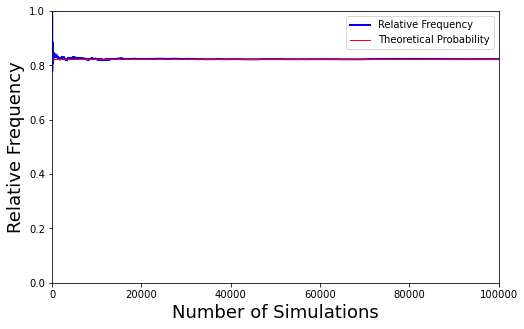

Theoretical Probability = 0.82432
  Simulated Probability = 0.823


In [8]:
#a)
cum_sum=np.cumsum(works) #accumulated sum
cum_mean=cum_sum/(np.arange(n_samples)+1) #relative frequency
plt.figure(figsize=(8,5))
plt.plot(cum_mean,'b-', linewidth = 2.0,label='Relative Frequency')
plt.axhline(0.82432, color='red', linewidth = 1.0,label='Theoretical Probability')
plt.xlabel('Number of Simulations', fontsize = 18)
plt.ylabel('Relative Frequency', fontsize = 18)
plt.axis([0, n_samples, 0, 1])
plt.legend()
plt.show()
#
p_simul=cum_mean [n_samples-1]
print ('Theoretical Probability = 0.82432')
print ('  Simulated Probability =',round(p_simul,6))

##### Part b
    
$$P(\overline{I_A}|C)=\frac{P(C|\overline{I_A})P(\overline{I_A})}{P(C)}=\frac{P(I_C \cap I_D \cap I_E)(1-P(I_A))}{P(C)}=\frac{0.8^3(1-0.8)}{0.82432}=0.124223602$$

Alternatively, which is easier for the simulation:

$$P(\overline{I_A}|C)=1-P(I_A|C)=1-\frac{P(C|I_A)P(I_A)}{P(C)}=1-\frac{P(I_B \cup (I_C \cap I_D \cap I_E))P(I_A)}{P(C)}=$$

$$=1-\frac{(P(I_B)+P(I_C \cap I_D \cap I_E)-P(I_B \cap I_C \cap I_D \cap I_E))P(I_A)}{P(C)}=$$

$$=1-\frac{(0.8+0.8^3-0.8^4)·0.8}{0.82432}=0.124223602$$

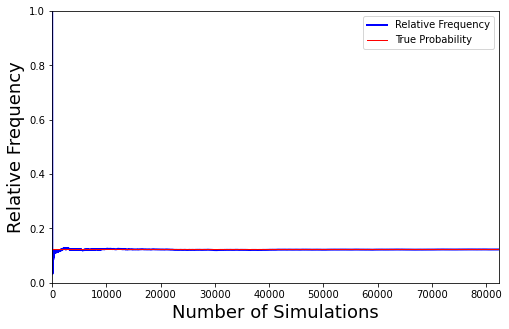

Theoretical Probability = 0.124223
  Simulated Probability = 0.122637


In [9]:
#b)
devices_working=dev[works] #only select cases where the circuit works
#now we can see the frequency of device A working
condition=devices_working[:,0] #device A works

cum_sum=np.cumsum(condition) #accumulated sum
cum_mean=1-cum_sum/(np.arange(cum_sum.size)+1) #relative frequency

plt.figure(figsize=(8,5))
plt.plot(cum_mean,'b-', linewidth = 2.0,label='Relative Frequency')
plt.axhline(0.124223602, color='red', linewidth = 1.0,label='True Probability')
plt.xlabel('Number of Simulations', fontsize = 18)
plt.ylabel('Relative Frequency', fontsize = 18)
plt.axis([0, cum_sum.size, 0, 1])
plt.legend()
plt.show()

p_simul=cum_mean [cum_sum.size-1]
print ('Theoretical Probability = 0.124223')
print ('  Simulated Probability =',round(p_simul,6))

##### Comments

We can see that the theoretical and simulated probabilities are very very close. Of course, the more simulations you perform, the closer the simulated probability gets to the theoretical one. Here, we have used 100000 circuit simulations. We can see that, in the beginning, there is always some large fluctuations in the relative frequency. However, as we add more simulations, it stabilizes and approaches the theoretical probability more and more every time.

#### Exercise 3
Consider the following random variables,  𝑋∼𝑁(𝜇=2;𝜎=5)  and  𝑌∼𝐵𝑖𝑛(𝑛=8;𝑝=0.75) . Compute the following:

𝑃(−2≤𝑋<5)= ?
𝑃(𝑋>𝑐)=0.9 , find the value of c.
𝑃(𝑌=3)= ?
𝑃(𝑌≥6)= ?

Altough we could do it without standaring the variables, we will standarize them any way, so that the process is clearer.

Then, after importing the functions of norm, binom and bernoulli, we can reduce this problem to call this functions to directly calculate the probabilities asked, since it is already specified that X follows a normal distribution and Y a binomial.

In [10]:
from scipy.stats import bernoulli, binom, norm

mu = 2
sigma = 5
x2 = -2
x5 = 5

z1 = (x2-mu)/sigma
z2 = (x5-mu)/sigma

z1 = abs(z1)
#z1 = -0.8
#z2 = 0.6

P = norm.cdf(0.6, 0, 1) + norm.cdf(0.8, 0, 1) - 1
P = round(P, 4)

print("P[-2≤X<5] = P[-0.8≤Z<0.6] = 1 - P[Z<0.8] + P[Z<0.6]= ",P)


P[-2≤X<5] = P[-0.8≤Z<0.6] = 1 - P[Z<0.8] + P[Z<0.6]=  0.5139


In [11]:
p = 0.9

cZ= norm.ppf(0.9, 0, 1) 
c = 5*cZ+2
c = round(c, 4)

print("P[X>c] = 1 - P[X<c] = 0.9")
print("The value we are looking for is: c = "+ str(c))

P[X>c] = 1 - P[X<c] = 0.9
The value we are looking for is: c = 8.4078


In [12]:
print ("Y=Bin(n=8,p=0.75)")
print("P[X=3] = ",round(binom.pmf(3,n=8, p=0.75), 4))   

p6 = binom.pmf(6, n=8, p=0.75)+binom.pmf(7, n=8, p=0.75)+binom.pmf(8, n=8, p=0.75)
p6 = round(p6, 4)

print("P[𝑌≥6] = P[Y=6] + P[Y=7] + P[Y=8] = "+str(p6))

Y=Bin(n=8,p=0.75)
P[X=3] =  0.0231
P[𝑌≥6] = P[Y=6] + P[Y=7] + P[Y=8] = 0.6785


### Exercise 4: 
A fair coin is tossed 1000 times,

1. What is the exact probability of obtaining at least 485 heads?
2. Provide an approximation of the answer to part a) by means of a normal distribution.
3. Simulate 1000 experiments consisting on tossing 1000 coins. In how may of those
experiments at least 485 heads were obtained?

#### Solution:


##### Part 1

The two possible outcomes of the experiment are discrete, so what we have here is a discrete random variable which can either take the value of "heads" (1) or "tails" (0).

It is also a Bernoulli experiment, so we can apply:

$$X ∼ B(n,p)$$

with $n=1000$ and $p=0.5$, considering $X$ as the random variable that describes the number of successes (heads) out of the $n$ repetitions of the experiment.

Therefore, we can apply the Binomial Distribution model with:

$$P[X \geq x]=\sum^{n}_{i=x}P[X=i]=\sum^{n}_{i=x} \binom{n}{i}p^i(1-p)^{n-i}$$

where $x=485$, $n=1000$ and $p=0.5$.

In python, we can just use the functions <code>binom.cdf(x, n, p)</code> and <code>binom.pmf(x, n, p)</code>, where:

$$P[X \geq x]=1-P[X < x]=1-P[X \leq x] + P[X=x]$$


In [13]:
from scipy.stats import bernoulli, binom, norm

In [14]:
#using binom function from scipy.stats
n = 1000   #total number of experiments
x = 485    #minimum number of successes
p = 0.5    #probability of success

prob = 1 - binom.cdf(x, n, p) + binom.pmf(x, n, p)   #P[X≥x]=1−P[X≤x]+P[X=x]

print("P[X ≥ 485] = ",round(prob, 6))

P[X ≥ 485] =  0.836532


We can also plot the probability mass function:

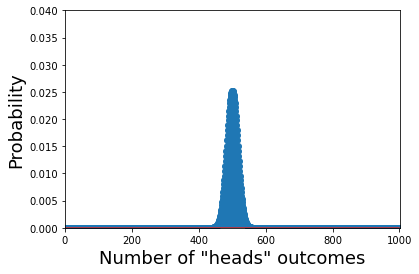

In [15]:
x_values = []

for i in range(n):
    x_values.extend([i+1])

plt.stem(x_values,binom.pmf(x_values, n, p = 0.5))
plt.xlim([0,n+1])
plt.ylim([0,0.04])
plt.xlabel('Number of "heads" outcomes', fontsize = 18)
plt.ylabel('Probability', fontsize = 18)
plt.show()



And the cumulative distribution function:

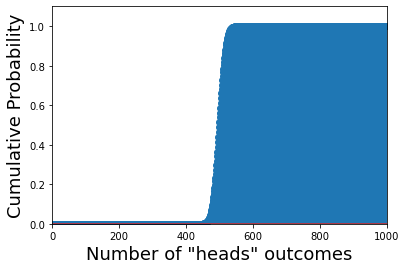

In [16]:
plt.stem(x_values,binom.cdf(x_values, n, p = 0.5))
plt.xlim([0,n+1])
plt.ylim([0,1.1])
plt.xlabel('Number of "heads" outcomes', fontsize = 18)
plt.ylabel('Cumulative Probability', fontsize = 18)
plt.show()

##### Part 2

We can approximate the value of the probability by using the a normal distribution $X ∼ N(\mu,\sigma)$, where $\mu = E[X]$ and $\sigma^2=V[X]$:

$$\mu=E[X]=\sum_{i=0}^n x_iP(X=x_i)$$
$$\sigma = \sqrt{V[X]}=\sqrt{E[(X-E[X])^2]}= \sqrt{\sum_{i=0}^n(x_i-E[X])^2P[X=x_i]}$$

In [17]:
mu = 0
sigma = 0
variance = 0

for i in range(n + 1):
    mu += i*binom.pmf(i, n, p)

for i in range(n + 1):
    variance += (i - mu)**2*binom.pmf(i, n, p)
sigma = np.sqrt(variance)

print("X ∼ N(μ, σ), where μ = ", round(mu, 6), " and σ = ", round(sigma, 6))

X ∼ N(μ, σ), where μ =  500.0  and σ =  15.811388


If we standardize the distribution, using $Z=\frac{X-\mu}{\sigma} ∼ N(0,1)$, we can obtain the approximated probability by computing:

$$P[X\geq x]=P\left[\frac{X-\mu}{\sigma} \geq \frac{x-\mu}{\sigma}\right]=P[Z \geq z]=P[Z \leq -z]$$

We can use the function <code>norm.cdf()</code> to get the value of cumulative normal standard distribution function at $-z$.

In [18]:
normal_prob = norm.cdf(-(x-mu)/sigma)

print("The approximation using the normal distribution is: P[X ≥ x] ≈", round(normal_prob,6))

The approximation using the normal distribution is: P[X ≥ x] ≈ 0.828609


Below we can see the plots of $X ∼ N(\mu,\sigma)$ and $Z ∼ N(0,1)$.

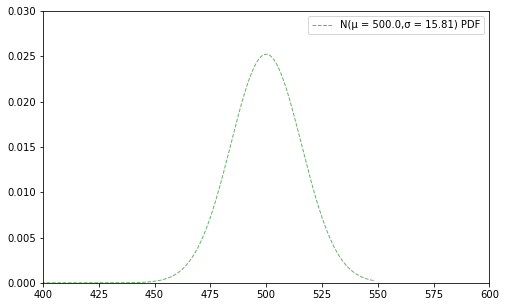

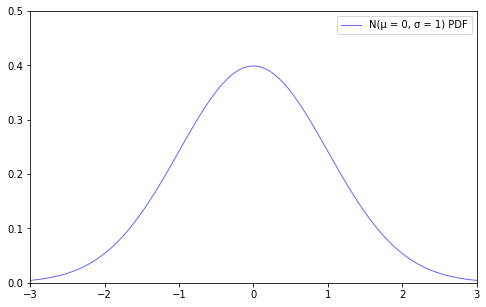

In [19]:
plt.figure(figsize=(8,5))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999,mu,sigma), 1000)
plt.plot(x, norm.pdf(x,mu,sigma),'g--', lw=1, alpha=0.6, label=f'N(μ = {round(mu,2)},σ = {round(sigma,2)}) PDF')

plt.legend(loc="upper right")
plt.ylim([0,0.03])
plt.xlim([400,600])
#plt.grid()
plt.show()


plt.figure(figsize=(8,5))

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999,0,1), 100)
plt.plot(x, norm.pdf(x,0,1),'b-', lw=1, alpha=0.6, label='N(μ = 0, σ = 1) PDF')

plt.legend(loc="upper right")
plt.ylim([0,0.5])
plt.xlim([-3,3])
#plt.grid()
plt.show()

##### Part 3

In [20]:
#generate simulated experiment
experiments = 1000  #number of experiment
n = 1000            #number of coin tosses per experiment
p = 0.5             #probability of "heads"

#we can randomly generate the coin tosses:
experiment_results = np.zeros((experiments, n))# create matrix to store results

def toss(p,experiments,n):
    for k in range(0,experiments):
        for i in range(0,n):
            experiment_results[k,i] = np.random.binomial(1,p) # 0=tails; 1=heads
    return experiment_results

experiment_results = toss(p,experiments,n)

#print(experiment_results)
print("Done")

Done


In [21]:
#count the number of heads in each experiment
heads = np.zeros((experiments, 1))#create a matrix to store number of heads per experiment

def headsCount(experiment_results,experiments,n):
    for k in range(0,experiments):
        for i in range(0,n):
            heads[k,0]+=experiment_results[k,i]
    return heads

heads = headsCount(experiment_results,experiments,n)
  
#print(heads)

print("Done")

Done


The number of experiments with at least 485 heads results are: 839


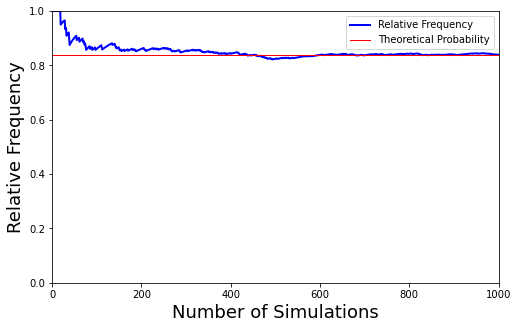

                       Theoretical Probability = 0.837
Approximated Probability (normal distribution) = 0.829
                         Simulated Probability = 0.839


In [22]:
#select experiments such that the number of heads is at least 485 and create graph
cum_sum=np.cumsum(heads>=485) #accumulated sum (create a matrix with the accumulated sum in each entry up to that point)
print("The number of experiments with at least 485 heads results are:",cum_sum[experiments-1])
cum_mean=cum_sum/(np.arange(experiments)+1) #relative frequency (divide each accumulated sum value by the number of samples accumulated)
plt.figure(figsize=(8,5))
plt.plot(cum_mean,'b-', linewidth = 2.0,label='Relative Frequency')
plt.axhline(0.836532, color='red', linewidth = 1.0,label='Theoretical Probability')
plt.xlabel('Number of Simulations', fontsize = 18)
plt.ylabel('Relative Frequency', fontsize = 18)
plt.axis([0, experiments, 0, 1])
plt.legend()
plt.show()
#
p_simul=cum_mean[experiments-1]
print ('                       Theoretical Probability =', round(prob,3))
print ('Approximated Probability (normal distribution) =', round(normal_prob,3))
print ('                         Simulated Probability =',round(p_simul,3))

##### Comments

In part a, we have calculated the theoretical value of the probability of our chosen event. Using this vaule of the probability as reference, we can see that the probability approximated by the normal model in part b is not very far off, but it is not exact. It has an error of 0.008. This difference is due to the fact that the normal model is actually meant for continuous random variables, whereas here we have a discrete random variable. Hence, the method is inexact and can only be considered valid as an approximation. At the same time, it is very useful because it offers a simple and non calculation-heavy method of estimating probabilities with considerable exactness.

Last of all, we can see that the simulated probability is also quite close to the real value, but it is often even further off than the normal approximation. Usually, the simulation presents an error of around 0.03. We would need more simulations in order to have a more exact result. 

In order to see the comparison between the normal distribution and the binomial model in a graphical way, we can plot them together like this:

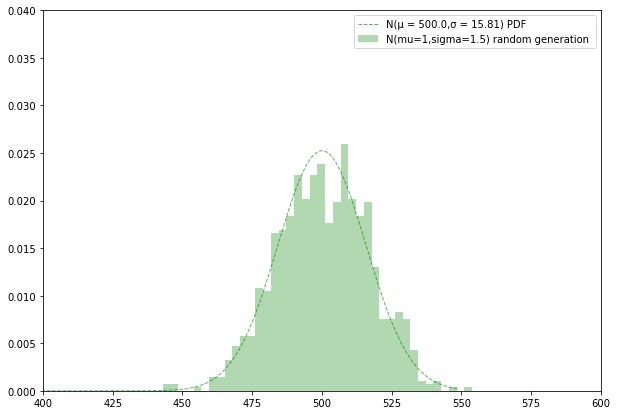

In [23]:
#plot random generation
plt.figure(figsize=(10,7))


r = norm(mu,sigma).rvs(size=1000) #random generation non standard normal
plt.hist(r,histtype='stepfilled', color='g', alpha=0.3, 
         bins=40,density=True,label='N(mu=1,sigma=1.5) random generation ')

x = np.linspace(norm.ppf(0.001), norm.ppf(0.999,mu,sigma), 1000)
plt.plot(x, norm.pdf(x,mu,sigma),'g--', lw=1, alpha=0.6, label=f'N(μ = {round(mu,2)},σ = {round(sigma,2)}) PDF')


plt.ylim([0,0.04])
plt.xlim([400,600])
#plt.grid()
plt.legend(loc="upper right")
plt.show()

### Exercise 5:
A supplier ships a lot of 100000 electrical connectors. Assume the lot contains 25000 defective connectors.  A sample of 10 is selected at random, without replacement. 
1. Using the binomial model, what is the probability that there are more than 3 defective connectors in the sample?
2. Use the normal approximation given by CLT to answer the result in part (a). Is the approximation satisfactory?
3. Redo parts 1. and 2. assuming the sample size is 10000 and that we want to compute the probability that there are more than 2550 defective connectors. Is the approximation satisfactory?


#### Solution

##### Part 1

First of all, we can determine the probability of a connector being defective:

$$p=\frac{25000}{100000}=0.25$$

Using the binomial model, where $X$ is the random variable that measures the number of defective connectors in a sample of $n=10$ connectors and $x=3$:

$$P[X > x]=\sum^{n}_{i=x+1}P[X=i]=\sum^{n}_{i=x+1} \binom{n}{i}p^i(1-p)^{n-i}$$

In python, we can use the function <code>binom.cdf(x, n, p)</code>, where:

$$P[X > x]=1-P[X \leq x]$$



In [24]:
x = 3
n = 10
p = 0.25

prob = 1 - binom.cdf(x,n,p)

print("P[X > 3] =", round(prob,6),"(exact probability)")

P[X > 3] = 0.224125 (exact probability)


##### Part 2

We can use the CLT to do a binomial approximation:

$$B(n,p) ∼ N\left(np, \sqrt{np(1-p)}\right)$$

where $n=10$ and $p=0.25$.

Then, if we standardize:

$$Z=\frac{X-np}{\sqrt{np(1-p)}}∼N[0,1]$$


However, as we are using python, we can skip the standarization and calculate the probability from $N\left(np, \sqrt{np(1-p)}\right)$ using the function <code>norm.cdf(x,μ,σ)</code>.

In [25]:
z=(x-n*p)/(np.sqrt(n*p*(1-p)))

a = 1-norm.cdf(x,n*p,np.sqrt(n*p*(1-p)))  #without standardizing
b = 1-norm.cdf(z,0,1)                     #standardizing
#both a and b give the same result

#print(a,b)

print("P[X > 3] =", round(a,6),"(approximated probability)")

P[X > 3] = 0.3575 (approximated probability)


##### Part 3

First of all, the probability of a connector being defective is the same as the initial one:

$$p=\frac{25000}{100000}=0.25$$

Using the binomial model, where $X$ is the random variable that measures the number of defective connectors in a sample of $n=10000$ connectors and $x=2550$:

$$P[X > x]=\sum^{n}_{i=x+1}P[X=i]=\sum^{n}_{i=x+1} \binom{n}{i}p^i(1-p)^{n-i}$$

In python, we can use the function <code>binom.cdf(x, n, p)</code>, where:

$$P[X > x]=1-P[X \leq x]$$

In [26]:
x = 2550
n = 10000
p = 0.25

prob = 1 - binom.cdf(x,n,p)

print("P[X > 2550] =", round(prob,6),"(exact probability)")

P[X > 2550] = 0.121895 (exact probability)


We can use the CLT to do a binomial approximation:

$$B(n,p) ∼ N\left(np, \sqrt{np(1-p)}\right)$$

where $n=10000$ and $p=0.25$.

Then, if we standardize:

$$Z=\frac{X-np}{\sqrt{np(1-p)}}∼N[0,1]$$


As before, we are using python, so we can skip the standarization and calculate the probability from $N\left(np, \sqrt{np(1-p)}\right)$ using the function <code>norm.cdf(x,μ,σ)</code>.

In [27]:
z=(x-n*p)/(np.sqrt(n*p*(1-p)))

a = 1-norm.cdf(x,n*p,np.sqrt(n*p*(1-p)))  #without standardizing
b = 1-norm.cdf(z,0,1)                     #standardizing
#both a and b give the same result

#print(a,b)

print("P[X > 3] =", round(a,6),"(approximated probability)")

P[X > 3] = 0.124107 (approximated probability)
